In [63]:
import numpy as np

data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/"

original_data_train_input = np.load(data_path + "original_data/train_inputdata.npy")
original_data_train_output = np.load(data_path + "original_data/train_outputdata.npy")
original_data_validation_input = np.load(data_path + "original_data/validation_inputdata.npy")
original_data_validation_output = np.load(data_path + "original_data/validation_outputdata.npy")

noisy_01_data_filtered_train_input = np.load(data_path + "noisy_0.1_data_filtered/train_inputdata.npy")
noisy_01_data_filtered_train_output = np.load(data_path + "noisy_0.1_data_filtered/train_outputdata.npy")
noisy_01_data_filtered_validation_input = np.load(data_path + "noisy_0.1_data_filtered/validation_inputdata.npy")
noisy_01_data_filtered_validation_output = np.load(data_path + "noisy_0.1_data_filtered/validation_outputdata.npy")

original_noisy_data_01_train_input = np.load(data_path + "original_noisy_data_0.1/train_inputdata.npy")
original_noisy_data_01_train_output = np.load(data_path + "original_noisy_data_0.1/train_outputdata.npy")
original_noisy_data_01_validation_input = np.load(data_path + "original_noisy_data_0.1/validation_inputdata.npy")
original_noisy_data_01_validation_output = np.load(data_path + "original_noisy_data_0.1/validation_outputdata.npy")

print(f"Train Input {original_data_train_input.shape} {noisy_01_data_filtered_train_input.shape} {original_noisy_data_01_train_input.shape}")
print(f"Train Output {original_data_train_output.shape} {noisy_01_data_filtered_train_output.shape} {original_noisy_data_01_train_output.shape}")
print(f"Validation Input {original_data_validation_input.shape} {noisy_01_data_filtered_validation_input.shape} {original_noisy_data_01_validation_input.shape}")
print(f"Validation Output {original_data_validation_output.shape} {noisy_01_data_filtered_validation_output.shape} {original_noisy_data_01_validation_output.shape}")

Train Input (1200000, 36) (1200000, 36) (1200000, 36)
Train Output (1200000, 24) (1200000, 24) (1200000, 24)
Validation Input (300000, 36) (300000, 36) (300000, 36)
Validation Output (300000, 24) (300000, 24) (300000, 24)


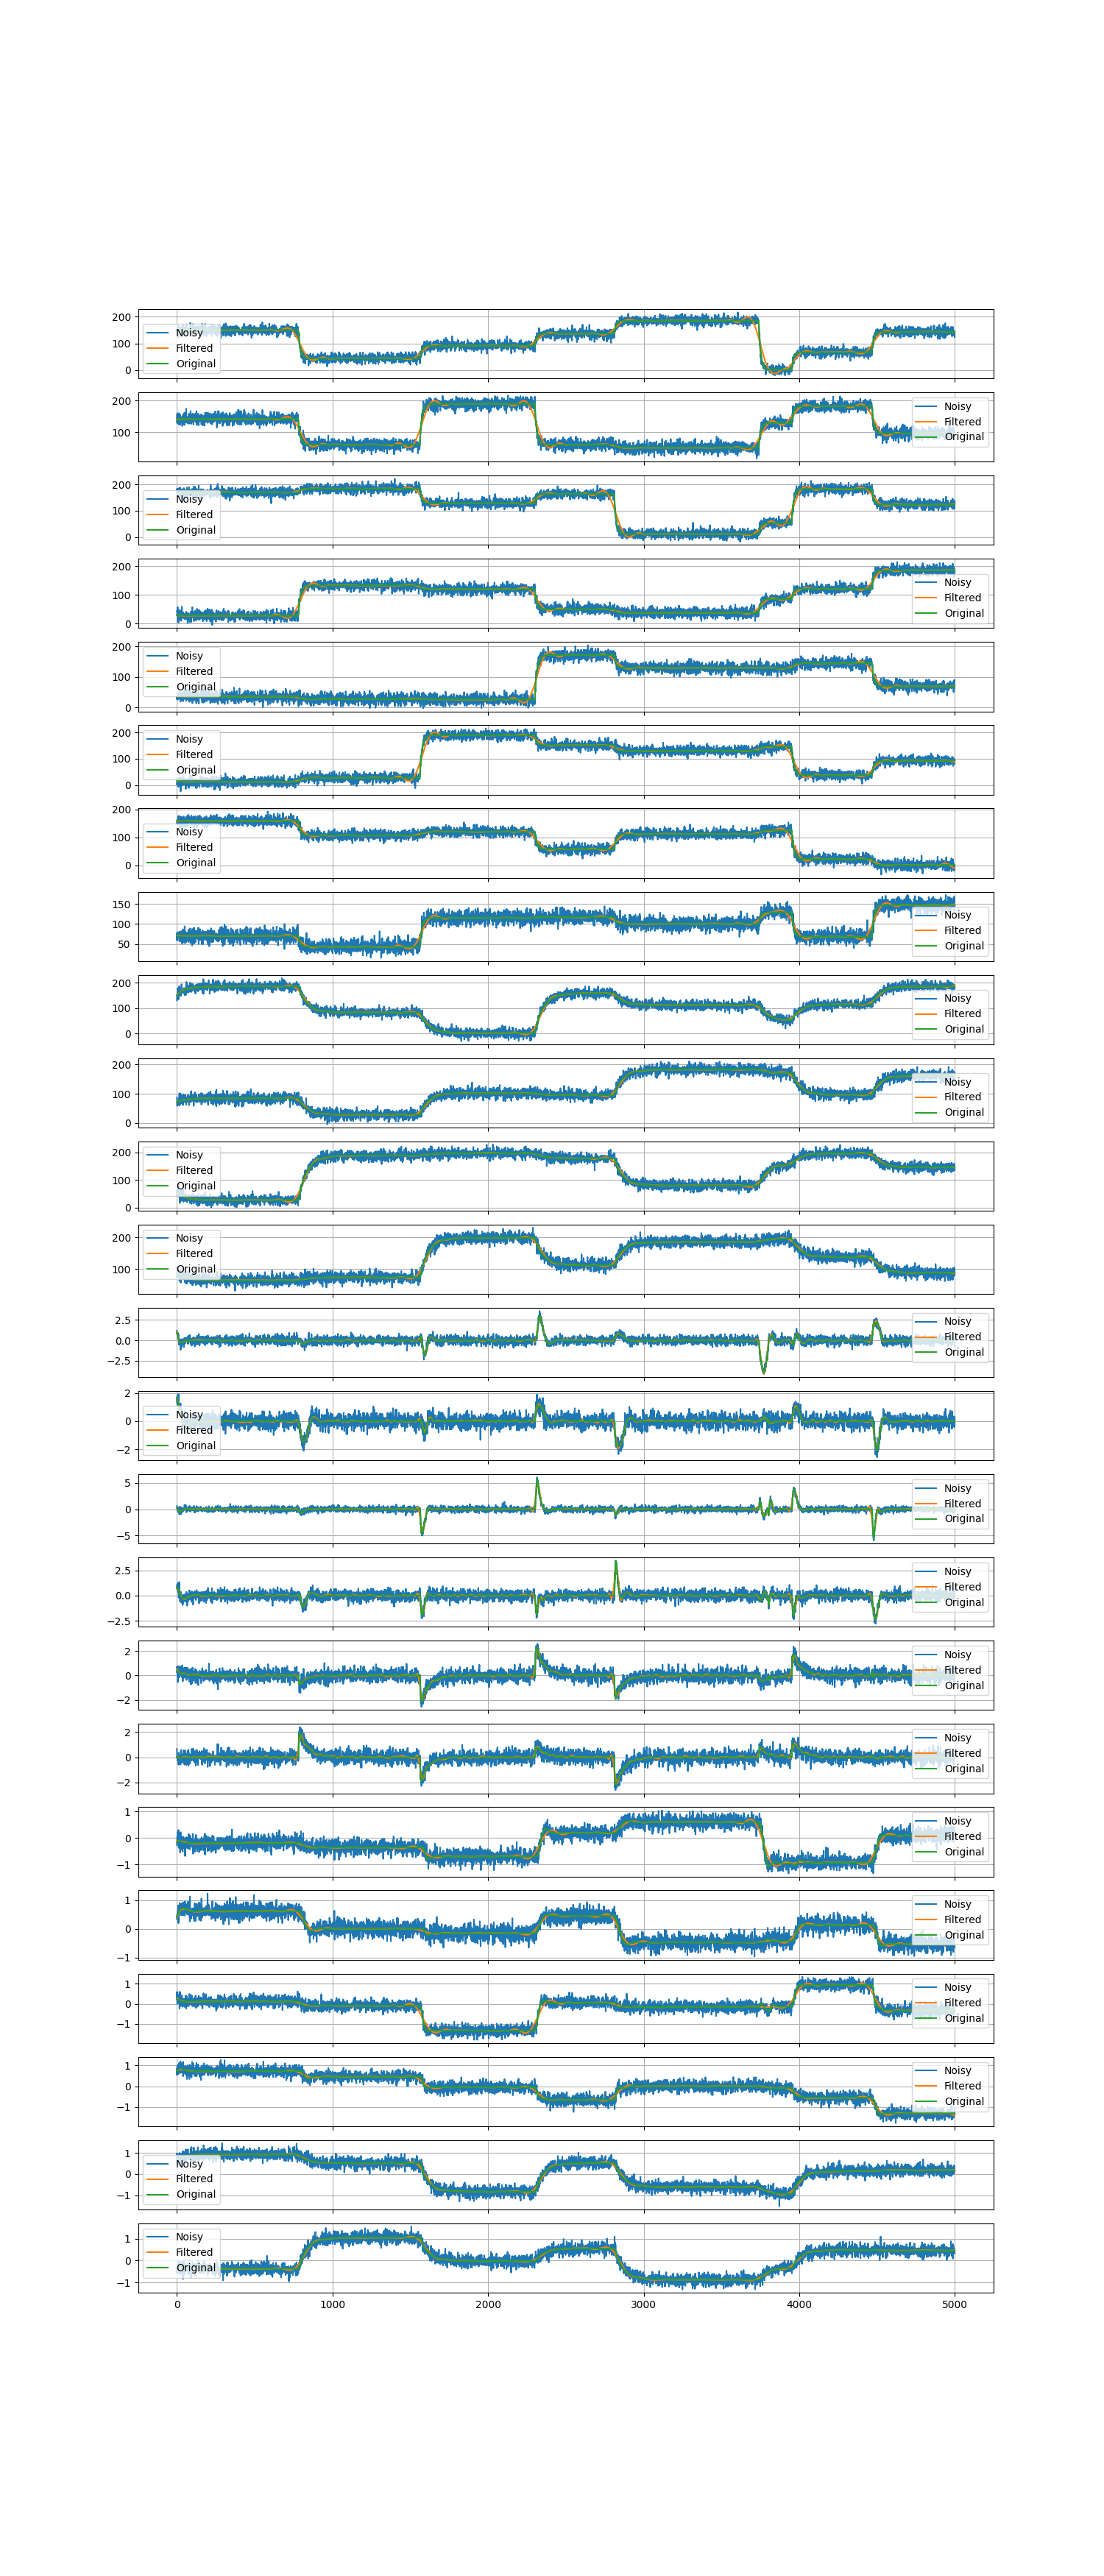

In [28]:
%matplotlib widget
import matplotlib.pyplot as plt

start = 0
end = 5000

fig, axs = plt.subplots(24,1, figsize=(15, 35), sharex=True)
for i in range(24):
    axs[i].plot(original_noisy_data_01_train_input[start:end, i], label="Noisy")
    axs[i].plot(noisy_01_data_filtered_train_input[start:end, i], label="Filtered")
    axs[i].plot(original_data_train_input[start:end, i], label="Original")
    axs[i].legend()
    axs[i].grid()

plt.show()

In [64]:
from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim

model = BalooSim()

# denormalize the data
state_mean = (model.xMax + model.xMin) / 2
state_std = (model.xMax - model.xMin) / 2
input_mean = (model.uMax + model.uMin) / 2
input_std = (model.uMax - model.uMin) / 2

original_data_train_input[:, :24] = original_data_train_input[:, :24] * state_std + state_mean
original_data_train_output = original_data_train_output * state_std + state_mean

noisy_01_data_filtered_train_input[:, :24] = noisy_01_data_filtered_train_input[:, :24] * state_std + state_mean
noisy_01_data_filtered_train_output = noisy_01_data_filtered_train_output * state_std + state_mean

original_noisy_data_01_train_input[:, :24] = original_noisy_data_01_train_input[:, :24] * state_std + state_mean
original_noisy_data_01_train_output = original_noisy_data_01_train_output * state_std + state_mean

In [65]:
# integrate the velcotiy data to see if it matches the position data

integrated_velocity_noisy_01_data_filtered_train_input = np.zeros((noisy_01_data_filtered_train_input.shape[0], 6))
integrated_velocity_original_noisy_data_01_train_input = np.zeros((original_noisy_data_01_train_input.shape[0], 6))
integrated_velocity_original_data_train_input = np.zeros((original_data_train_input.shape[0], 6))

integrated_output_noisy_01_data_filtered = np.zeros((noisy_01_data_filtered_train_output.shape[0], 6))
integrated_output_original_noisy_data_01 = np.zeros((original_noisy_data_01_train_output.shape[0], 6))
integrated_output_original_data = np.zeros((original_data_train_output.shape[0], 6))

integrated_velocity_noisy_01_data_filtered_train_input[0] = noisy_01_data_filtered_train_input[0, 18:24]
integrated_velocity_original_noisy_data_01_train_input[0] = original_noisy_data_01_train_input[0, 18:24]
integrated_velocity_original_data_train_input[0] = original_data_train_input[0, 18:24]

integrated_output_noisy_01_data_filtered[0] = noisy_01_data_filtered_train_input[0, 18:24]
integrated_output_original_noisy_data_01[0] = original_noisy_data_01_train_input[0, 18:24]
integrated_output_original_data[0] = original_data_train_input[0, 18:24]

for i in range(1, noisy_01_data_filtered_train_input.shape[0]):
    # use trapezoidal rule to integrate the velocity
    integrated_velocity_noisy_01_data_filtered_train_input[i] = integrated_velocity_noisy_01_data_filtered_train_input[i-1] + 0.5*(noisy_01_data_filtered_train_input[i, 12:18] + noisy_01_data_filtered_train_input[i-1, 12:18])*0.01
    integrated_velocity_original_noisy_data_01_train_input[i] = integrated_velocity_original_noisy_data_01_train_input[i-1] + 0.5*(original_noisy_data_01_train_input[i, 12:18] + original_noisy_data_01_train_input[i-1, 12:18])*0.01
    integrated_velocity_original_data_train_input[i] = integrated_velocity_original_data_train_input[i-1] + 0.5*(original_data_train_input[i, 12:18] + original_data_train_input[i-1, 12:18])*0.01

    # add together the input
    integrated_output_noisy_01_data_filtered[i] = integrated_output_noisy_01_data_filtered[i-1] + noisy_01_data_filtered_train_output[i, 18:24]
    integrated_output_original_noisy_data_01[i] = integrated_output_original_noisy_data_01[i-1] + original_noisy_data_01_train_output[i, 18:24]
    integrated_output_original_data[i] = integrated_output_original_data[i-1] + original_data_train_output[i, 18:24]

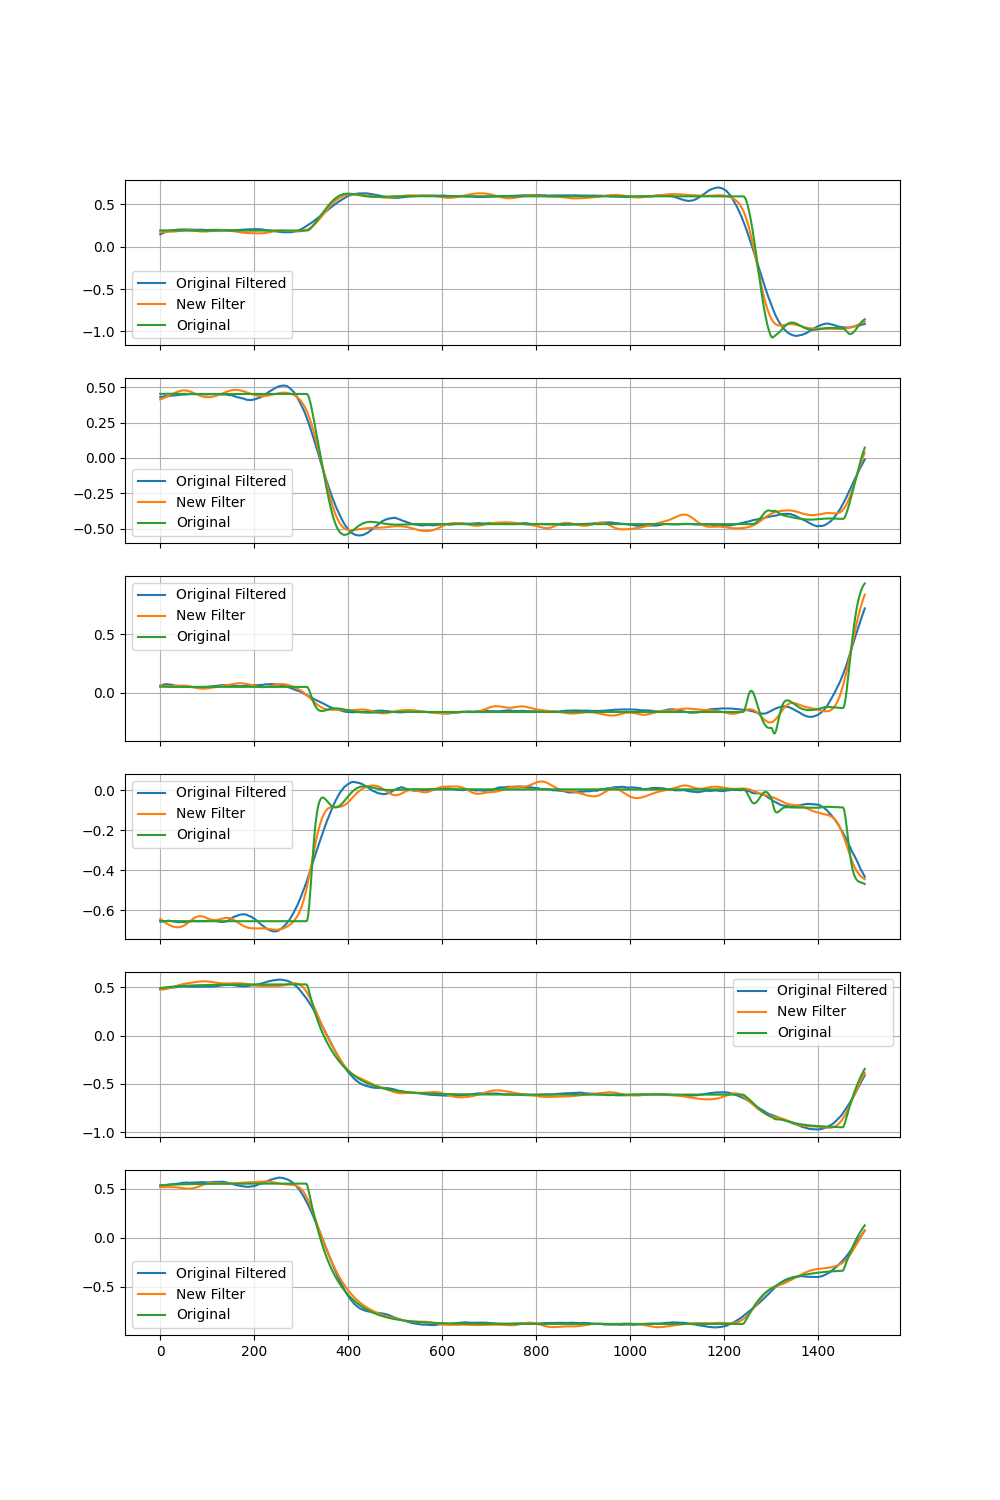

In [69]:
from scipy.signal import sosfiltfilt, butter

cutoff_freq = 1.0
sos = butter(10, cutoff_freq, output='sos', fs=100)

# filtered_pos_data = sosfiltfilt(sos, original_noisy_data_01_train_input[:, 18:24], axis=0)

# median filtering
# from scipy.signal import medfilt
# filtered_pos_data = np.zeros((original_noisy_data_01_train_input.shape[0], 6))
# for i in range(6):
#     filtered_pos_data[:, i] = medfilt(original_noisy_data_01_train_input[:, 18+i], 31)

# gaussian filtering
from scipy.ndimage import gaussian_filter1d
filtered_pos_data = gaussian_filter1d(original_noisy_data_01_train_input[:, 18:24], 19, axis=0)

import matplotlib.pyplot as plt

start = 2500
end = 4000

fig, axs = plt.subplots(6,1, figsize=(10, 15), sharex=True)
for i in range(6):
    axs[i].plot(noisy_01_data_filtered_train_input[start:end, i+18], label="Original Filtered")
    axs[i].plot(filtered_pos_data[start:end, i], label="New Filter")
    axs[i].plot(original_data_train_input[start:end, i+18], label="Original")
    axs[i].legend()
    axs[i].grid()


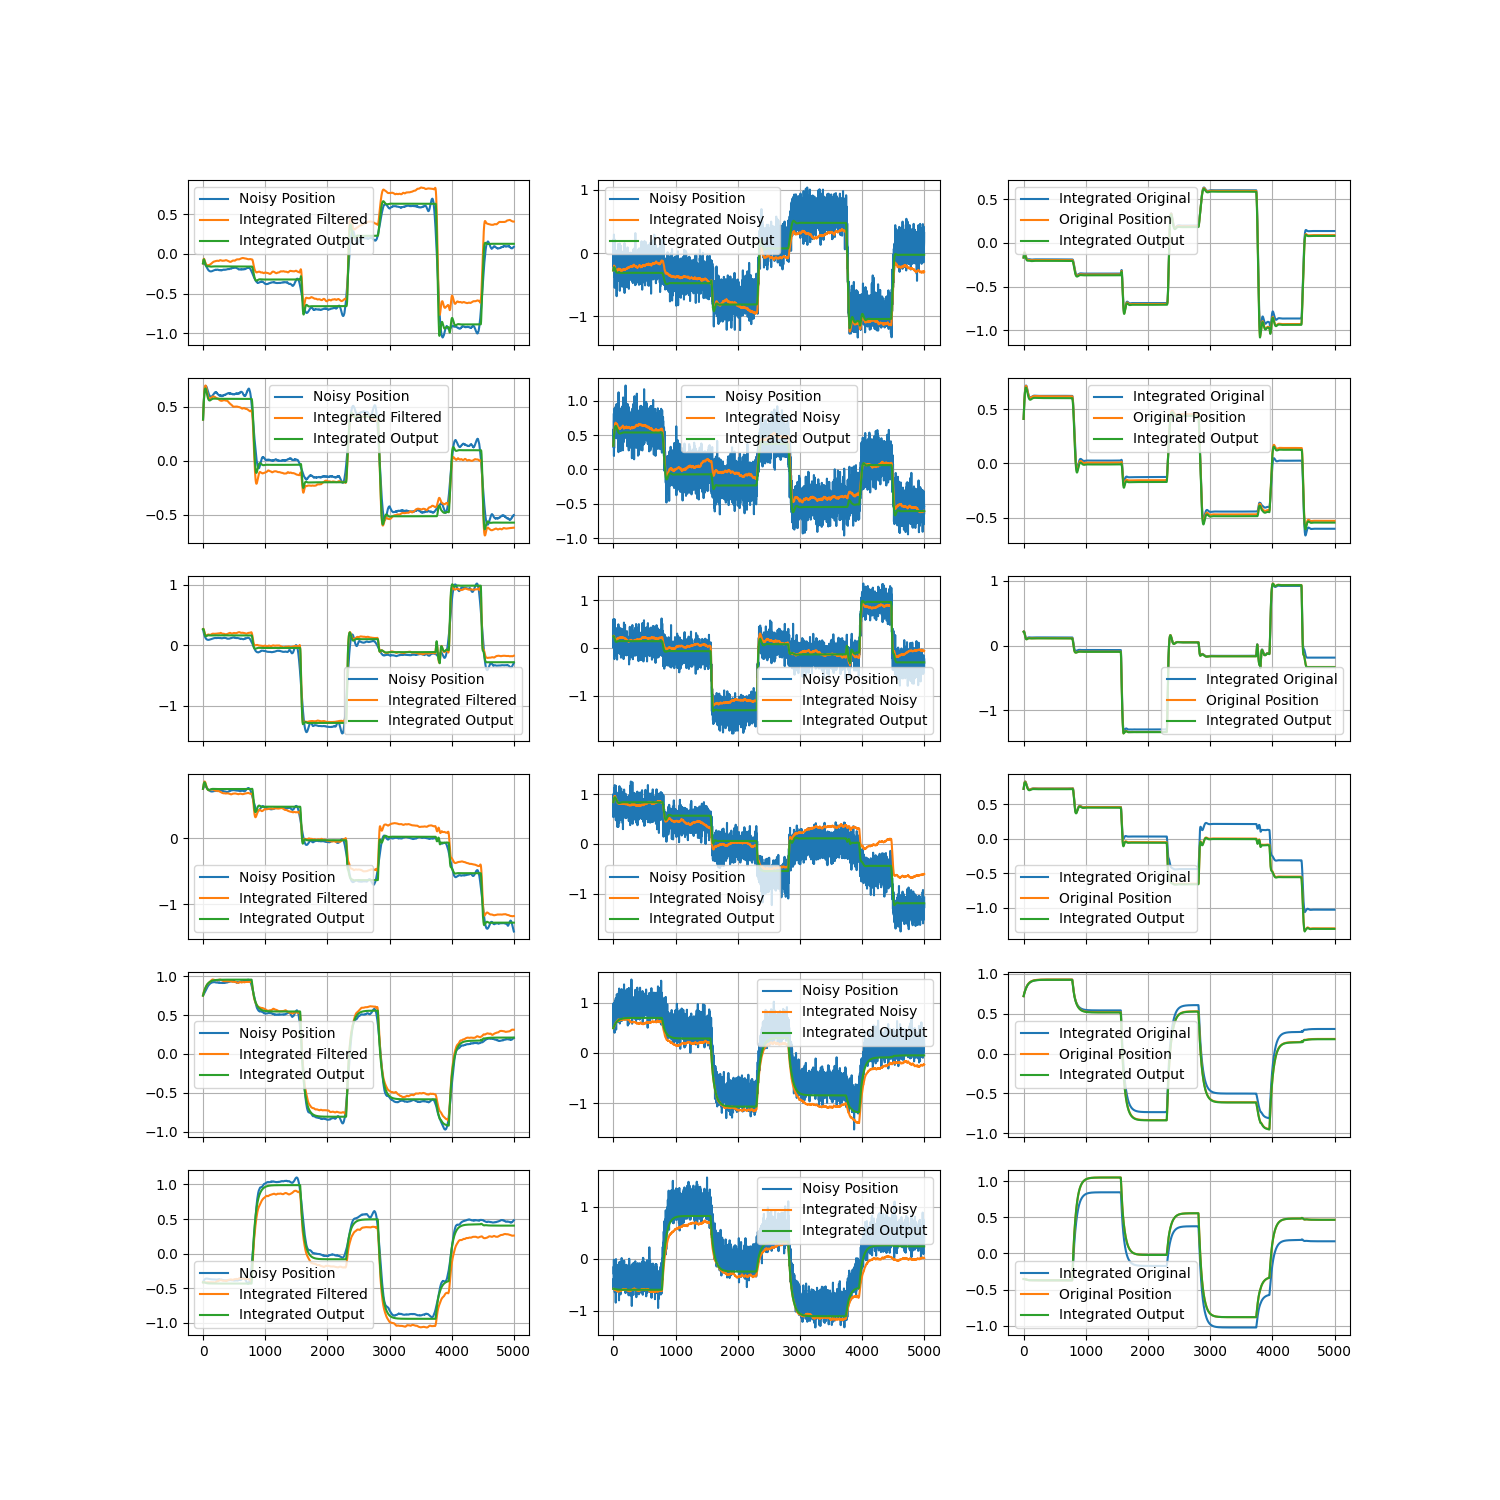

In [59]:
%matplotlib widget
import matplotlib.pyplot as plt

start = 0
end = 5000

fig, axs = plt.subplots(6, 3, figsize=(15, 15), sharex=True)
for i in range(6):
    axs[i, 0].plot(noisy_01_data_filtered_train_input[start:end, i+18], label="Noisy Position")
    axs[i, 0].plot(integrated_velocity_noisy_01_data_filtered_train_input[start:end, i], label="Integrated Filtered")
    axs[i, 0].plot(integrated_output_noisy_01_data_filtered[start:end, i], label="Integrated Output")
    
    axs[i, 1].plot(original_noisy_data_01_train_input[start:end, i+18], label="Noisy Position")
    axs[i, 1].plot(integrated_velocity_original_noisy_data_01_train_input[start:end, i], label="Integrated Noisy")
    axs[i, 1].plot(integrated_output_original_noisy_data_01[start:end, i], label="Integrated Output")

    axs[i, 2].plot(integrated_velocity_original_data_train_input[start:end, i], label="Integrated Original")
    axs[i, 2].plot(original_data_train_input[start:end, i+18], label="Original Position")
    axs[i, 2].plot(integrated_output_original_data[start:end, i], label="Integrated Output")
    
for ax in axs.flatten():
    ax.legend()
    ax.grid()

plt.show()

In [24]:
# numerically differentiate position to see if it matches the velocities

differentiated_position_noisy_01_data_filtered_train_input = np.zeros((noisy_01_data_filtered_train_input.shape[0], 6))
differentiated_position_original_noisy_data_01_train_input = np.zeros((original_noisy_data_01_train_input.shape[0], 6))
differentiated_position_original_data_train_input = np.zeros((original_data_train_input.shape[0], 6))

for i in range(1, noisy_01_data_filtered_train_input.shape[0]):
    # use forward difference to differentiate the position
    differentiated_position_noisy_01_data_filtered_train_input[i] = (noisy_01_data_filtered_train_input[i, 18:24] - noisy_01_data_filtered_train_input[i-1, 18:24])/0.01
    differentiated_position_original_noisy_data_01_train_input[i] = (original_noisy_data_01_train_input[i, 18:24] - original_noisy_data_01_train_input[i-1, 18:24])/0.01
    differentiated_position_original_data_train_input[i] = (original_data_train_input[i, 18:24] - original_data_train_input[i-1, 18:24])/0.01

In [43]:
from scipy.signal import sosfiltfilt, butter

cutoff_freq = 10.0
sos = butter(5, cutoff_freq, output='sos', fs=100)

double_filtered_velocity_data = sosfiltfilt(sos, original_noisy_data_01_train_input[:, 12:18], axis=0)

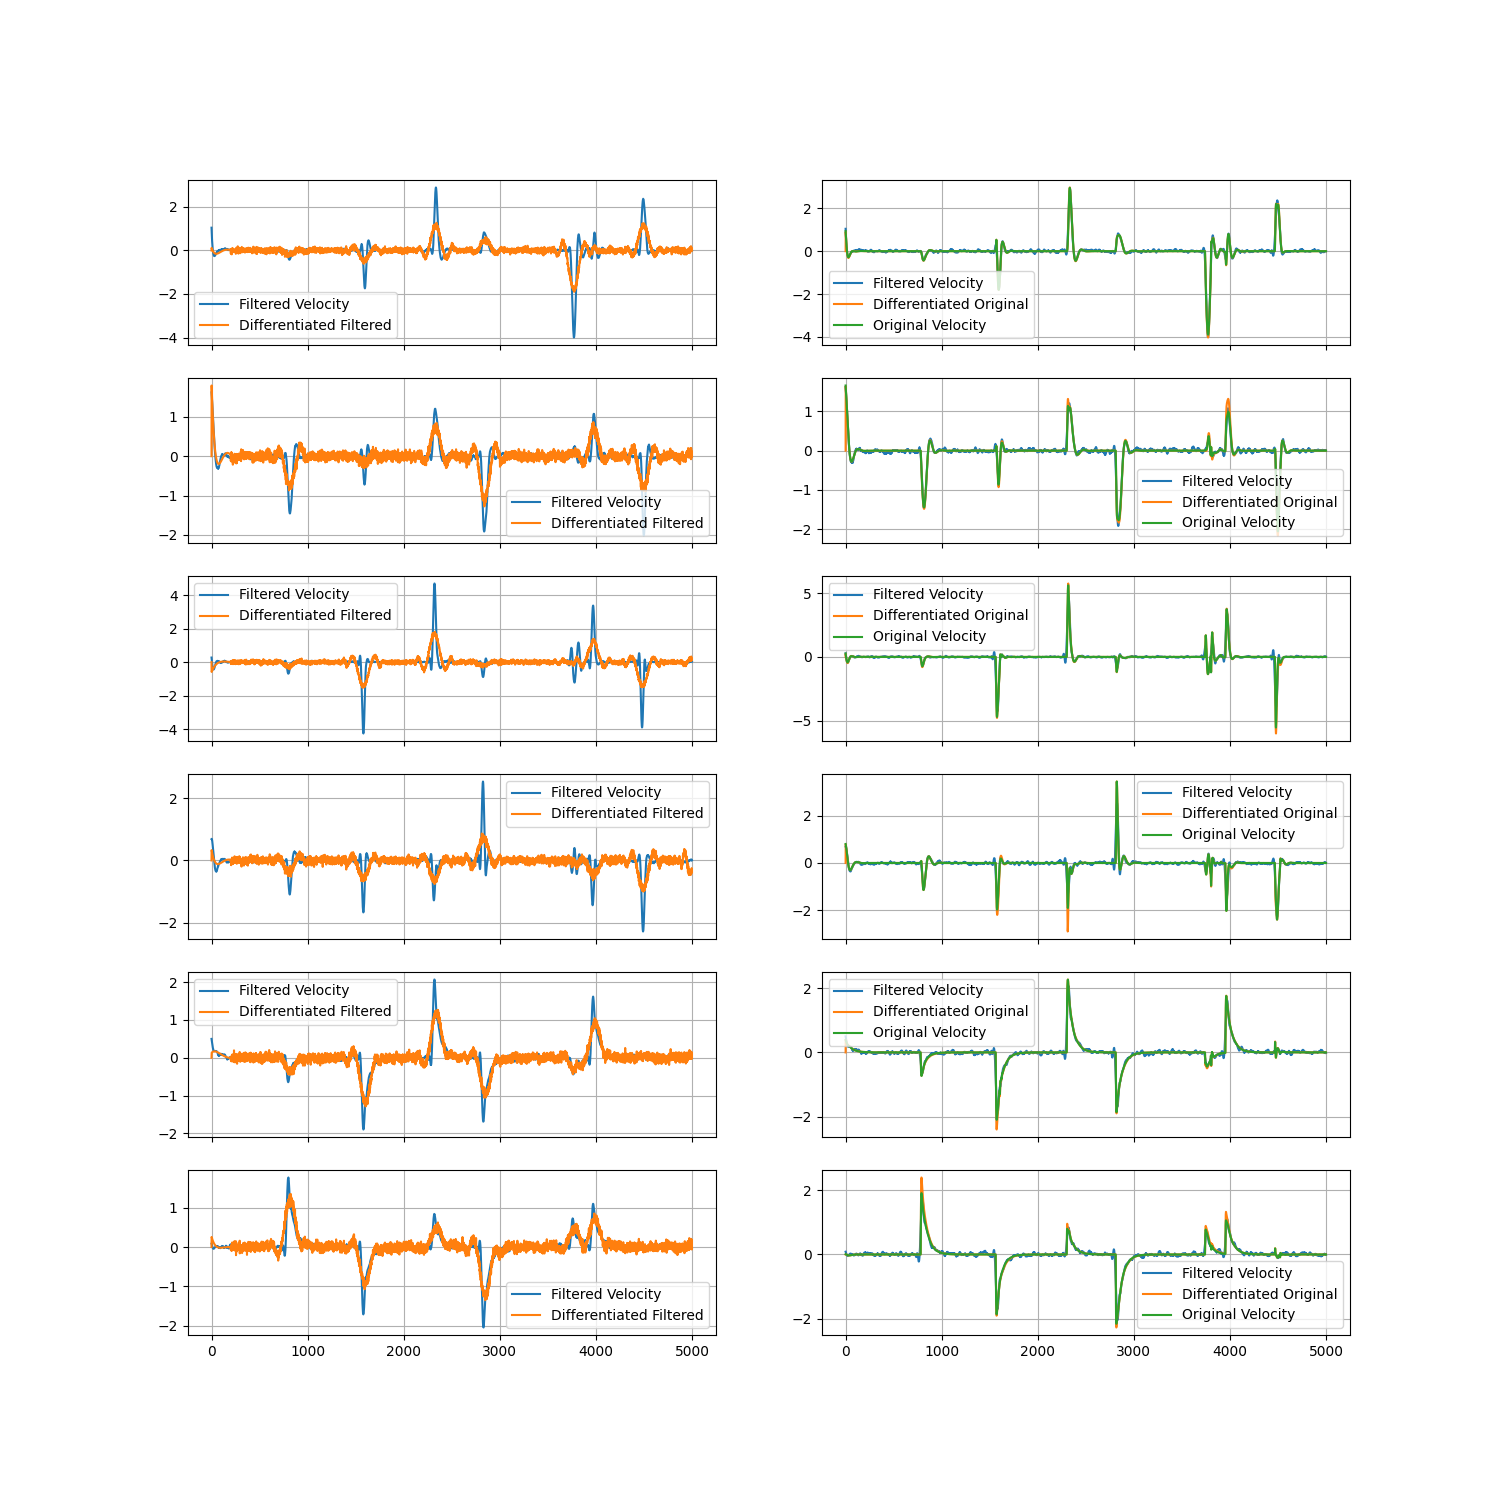

In [61]:
# plot
%matplotlib widget
import matplotlib.pyplot as plt

start = 0
end = 5000

fig, axs = plt.subplots(6, 2, figsize=(15, 15), sharex=True)
for i in range(6):
    # axs[i, 0].plot(original_noisy_data_01_train_input[start:end, i+12], label="Noisy Velocity")
    axs[i, 0].plot(noisy_01_data_filtered_train_input[start:end, i+12], label="Filtered Velocity")
    axs[i, 0].plot(differentiated_position_noisy_01_data_filtered_train_input[start:end, i], label="Differentiated Filtered")

    # axs[i, 1].plot(differentiated_position_original_noisy_data_01_train_input[start:end, i], label="Differentiated Noisy")
    # axs[i, 1].plot(original_noisy_data_01_train_input[start:end, i+12], label="Noisy Velocity")

    axs[i, 1].plot(noisy_01_data_filtered_train_input[start:end, i+12], label="Filtered Velocity")
    axs[i, 1].plot(differentiated_position_original_data_train_input[start:end, i], label="Differentiated Original")
    axs[i, 1].plot(original_data_train_input[start:end, i+12], label="Original Velocity")
    # axs[i, 1].plot(double_filtered_velocity_data[start:end, i], label="Double Filtered")

for ax in axs.flatten():
    ax.legend()
    ax.grid()

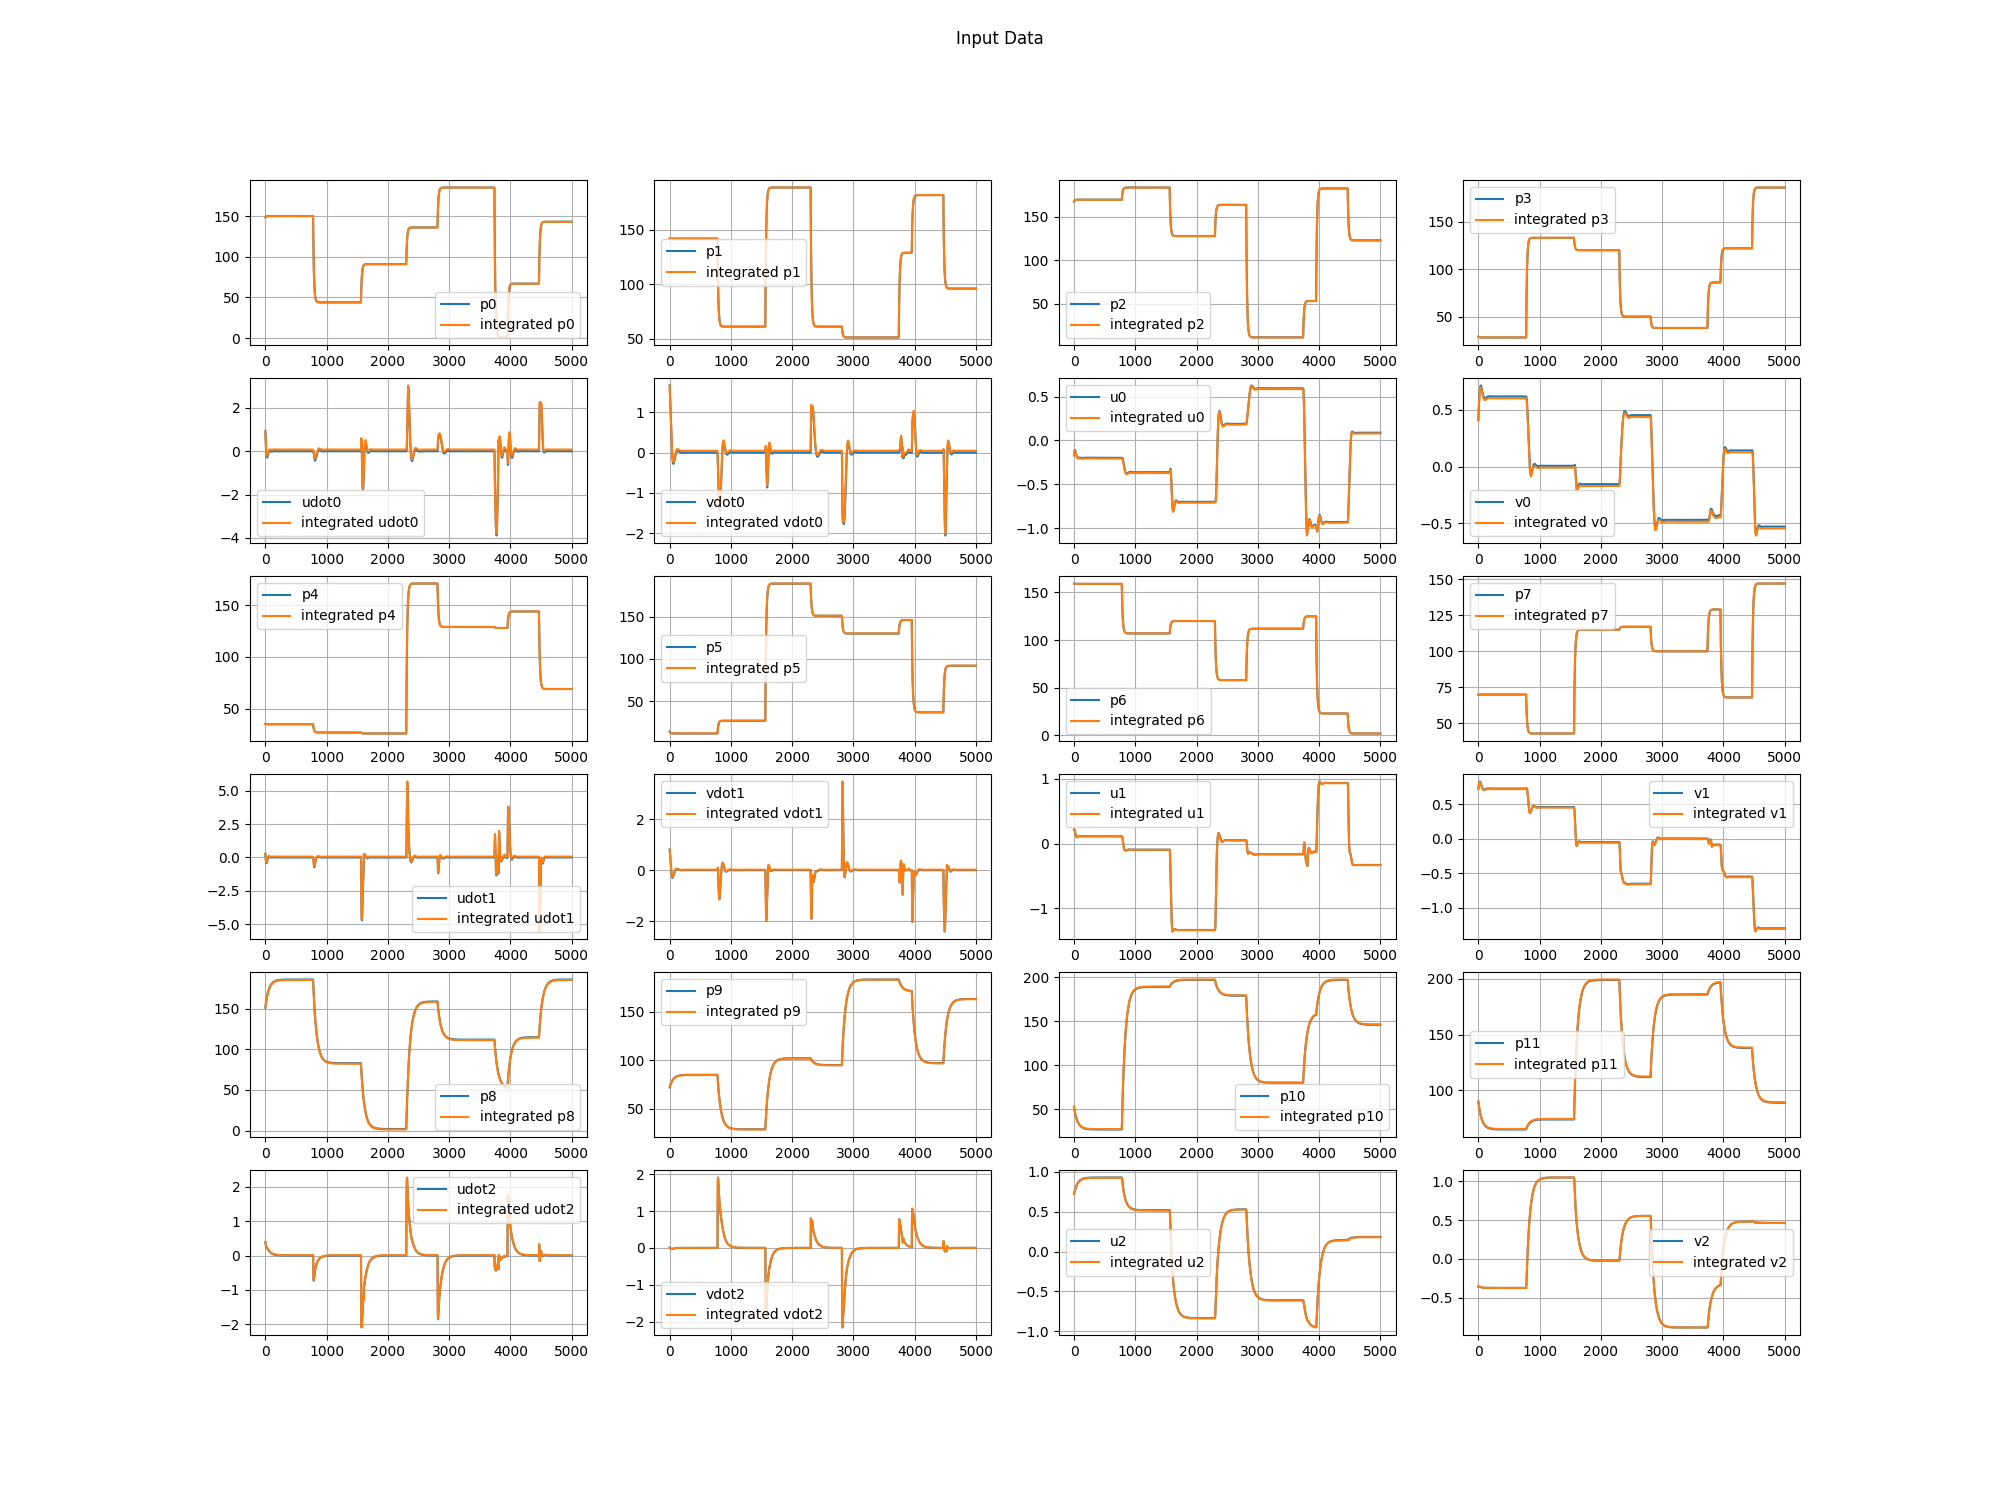

In [21]:
#Make sure the output data is correct 
%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, 4)
fig.set_size_inches(20, 15)
fig.suptitle('Input Data')
start = 0
end = 5000

arm_input_train_data = original_data_train_input
arm_output_train_data = original_data_train_output

# arm_input_train_data = not_smooth_all_inputs
# arm_output_train_data = not_smooth_all_outputs

integrated_arm_data = np.zeros((arm_input_train_data.shape[0], 24))

integrated_arm_data[0, :] = arm_input_train_data[0, :24]

for i in range(start+1, end):
    integrated_arm_data[i, :] = arm_output_train_data[i, :] + integrated_arm_data[i-1,:]

axs[0, 0].plot(arm_input_train_data[start:end,0], label='p0')
axs[0, 1].plot(arm_input_train_data[start:end,1], label='p1')
axs[0, 2].plot(arm_input_train_data[start:end,2], label='p2')
axs[0, 3].plot(arm_input_train_data[start:end,3], label='p3')

axs[1, 0].plot(arm_input_train_data[start:end,12], label='udot0')
axs[1, 1].plot(arm_input_train_data[start:end,13], label='vdot0')
axs[1, 2].plot(arm_input_train_data[start:end,18], label='u0')
axs[1, 3].plot(arm_input_train_data[start:end,19], label='v0')

axs[2, 0].plot(arm_input_train_data[start:end,4], label='p4')
axs[2, 1].plot(arm_input_train_data[start:end,5], label='p5')
axs[2, 2].plot(arm_input_train_data[start:end,6], label='p6')
axs[2, 3].plot(arm_input_train_data[start:end,7], label='p7')

axs[3, 0].plot(arm_input_train_data[start:end,14], label='udot1')
axs[3, 1].plot(arm_input_train_data[start:end,15], label='vdot1')
axs[3, 2].plot(arm_input_train_data[start:end,20], label='u1')
axs[3, 3].plot(arm_input_train_data[start:end,21], label='v1')

axs[4, 0].plot(arm_input_train_data[start:end,8], label='p8')
axs[4, 1].plot(arm_input_train_data[start:end,9], label='p9')
axs[4, 2].plot(arm_input_train_data[start:end,10], label='p10')
axs[4, 3].plot(arm_input_train_data[start:end,11], label='p11')

axs[5, 0].plot(arm_input_train_data[start:end,16], label='udot2')
axs[5, 1].plot(arm_input_train_data[start:end,17], label='vdot2')
axs[5, 2].plot(arm_input_train_data[start:end,22], label='u2')
axs[5, 3].plot(arm_input_train_data[start:end,23], label='v2')

axs[0, 0].plot(integrated_arm_data[start:end,0], label='integrated p0')
axs[0, 1].plot(integrated_arm_data[start:end,1], label='integrated p1')
axs[0, 2].plot(integrated_arm_data[start:end,2], label='integrated p2')
axs[0, 3].plot(integrated_arm_data[start:end,3], label='integrated p3')

axs[1, 0].plot(integrated_arm_data[start:end,12], label='integrated udot0')
axs[1, 1].plot(integrated_arm_data[start:end,13], label='integrated vdot0')
axs[1, 2].plot(integrated_arm_data[start:end,18], label='integrated u0')
axs[1, 3].plot(integrated_arm_data[start:end,19], label='integrated v0')

axs[2, 0].plot(integrated_arm_data[start:end,4], label='integrated p4')
axs[2, 1].plot(integrated_arm_data[start:end,5], label='integrated p5')
axs[2, 2].plot(integrated_arm_data[start:end,6], label='integrated p6')
axs[2, 3].plot(integrated_arm_data[start:end,7], label='integrated p7')

axs[3, 0].plot(integrated_arm_data[start:end,14], label='integrated udot1')
axs[3, 1].plot(integrated_arm_data[start:end,15], label='integrated vdot1')
axs[3, 2].plot(integrated_arm_data[start:end,20], label='integrated u1')
axs[3, 3].plot(integrated_arm_data[start:end,21], label='integrated v1')

axs[4, 0].plot(integrated_arm_data[start:end,8], label='integrated p8')
axs[4, 1].plot(integrated_arm_data[start:end,9], label='integrated p9')
axs[4, 2].plot(integrated_arm_data[start:end,10], label='integrated p10')
axs[4, 3].plot(integrated_arm_data[start:end,11], label='integrated p11')

axs[5, 0].plot(integrated_arm_data[start:end,16], label='integrated udot2')
axs[5, 1].plot(integrated_arm_data[start:end,17], label='integrated vdot2')
axs[5, 2].plot(integrated_arm_data[start:end,22], label='integrated u2')
axs[5, 3].plot(integrated_arm_data[start:end,23], label='integrated v2')


for ax in axs.flat:
    ax.legend()
    ax.grid(True)